## Creating our first neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def initialize(n0, n1, n2): #n0 inputs, n1 number of neurons in the first layer, n2 number of neurons in the second layer 
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    params = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }

    return params

In [3]:
def forward_propagation(X, params):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1/(1+np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1/(1+np.exp(-Z2))

    activations = {
        'A1':A1,
        'A2':A2
    }

    return activations

In [4]:
def back_propagation(X, y, activations, params):
    W2 = params['W2']
    A1 = activations['A1']
    A2 = activations['A2']

    dZ2 = A2-y
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1-A1)
    m = y.shape[0]

    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True) #we have to keep both dimensions to avoid broadcasting

    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW1':dW1,
        'db1':db1,
        'dW2':dW2,
        'db2':db2
    }

    return gradients

In [5]:
def update(gradients, params, learning_rate):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    params = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }

    return params

In [6]:
def predict(X, params):
    activations = forward_propagation(X, params)
    A2 = activations['A2']
    return A2 >= 0.5

In [7]:
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

def neural_network(X_train, y_train, n1, learning_rate=0.1, n_iter=100):
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    params = initialize(n0, n1, n2)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)): 
        activations = forward_propagation(X_train, params) 
        gradients = back_propagation(X_train, y_train, activations, params)
        params = update(gradients, params, learning_rate)

        #to make the calculations faster, we'll calculate the loss and score each time we have a multiple of 10
        if i%10 == 0:
            #Train
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, params)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train accuracy")
    plt.legend()
    plt.show()

    return params

## Testing our first neural network

X dims :  (100, 2)
y dims :  (100, 1)


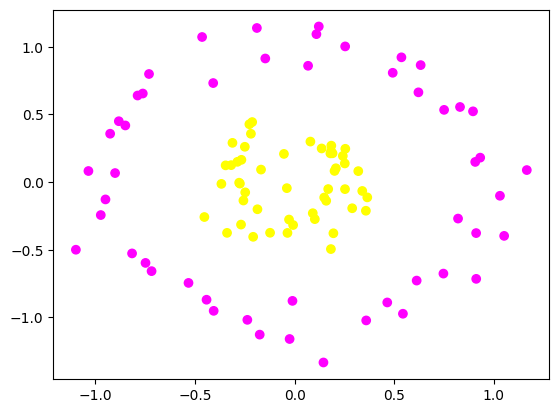

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
y = y.reshape((y.shape[0], 1))

print('X dims : ', X.shape)
print('y dims : ', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring')
plt.show()

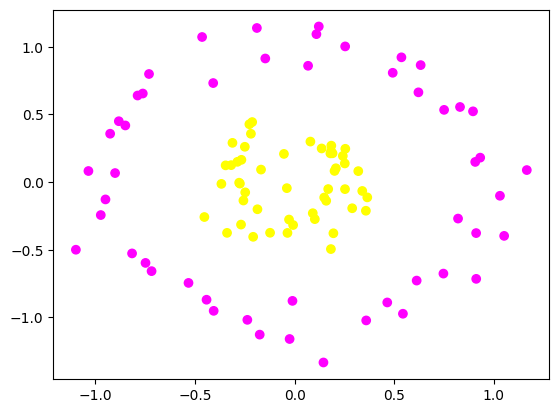

In [9]:
X = X.T
y = y.reshape((1, y.shape[0]))

plt.scatter(X[0], X[1], c=y, cmap='spring')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 5076.27it/s]


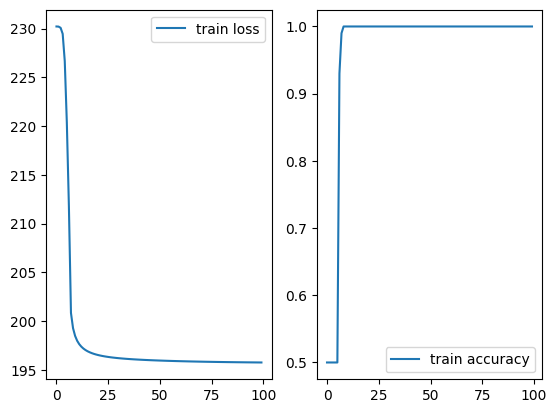

In [10]:
params = neural_network(X, y, n1=3, learning_rate=0.1, n_iter=1000)

## Using our neural network for cat and dog detection

In [11]:
from utilities import load_data

In [12]:
X_train, y_train, X_test, y_test = load_data()

In [13]:
print(f"X_train shape : {X_train.shape}\ny_train shape : {y_train.shape}")
print(f"X_train shape : {X_test.shape}\ny_train shape : {y_test.shape}")

X_train shape : (1000, 64, 64)
y_train shape : (1000, 1)
X_train shape : (200, 64, 64)
y_train shape : (200, 1)


c:\Users\ghsts\Documents\DeepLearning\.dlenv\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


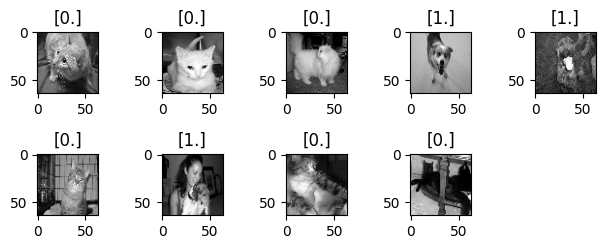

In [14]:
plt.figure()
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [16]:
def Normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [17]:
X_train = X_train.astype('float16')
for i in range(0, X_train.shape[0]):
    X_train[i] = Normalize(X_train[i])

X_train

array([[[0.648  , 0.6885 , 0.6436 , ..., 0.567  , 0.514  , 0.5264 ],
        [0.6396 , 0.6885 , 0.7207 , ..., 0.563  , 0.567  , 0.502  ],
        [0.6235 , 0.668  , 0.7407 , ..., 0.6235 , 0.563  , 0.595  ],
        ...,
        [0.6924 , 0.664  , 0.656  , ..., 0.3523 , 0.6963 , 0.684  ],
        [0.66   , 0.656  , 0.656  , ..., 0.166  , 0.7285 , 0.4858 ],
        [0.6963 , 0.68   , 0.664  , ..., 0.336  , 0.7124 , 0.1417 ]],

       [[0.1409 , 0.1455 , 0.1273 , ..., 0.1637 , 0.159  , 0.1409 ],
        [0.12274, 0.15   , 0.1409 , ..., 0.1318 , 0.1637 , 0.1409 ],
        [0.1545 , 0.159  , 0.11365, ..., 0.1455 , 0.1318 , 0.12274],
        ...,
        [0.3455 , 0.3364 , 0.268  , ..., 0.291  , 0.3044 , 0.3228 ],
        [0.268  , 0.268  , 0.2727 , ..., 0.1864 , 0.2546 , 0.259  ],
        [0.241  , 0.2273 , 0.2228 , ..., 0.2    , 0.1864 , 0.2    ]],

       [[0.092  , 0.088  , 0.1    , ..., 0.32   , 0.312  , 0.32   ],
        [0.1    , 0.092  , 0.096  , ..., 0.34   , 0.336  , 0.34   ],
    

In [18]:
X_test = X_test.astype('float16')
for i in range(0, X_test.shape[0]):
    X_test[i] = Normalize(X_test[i])

X_test

array([[[0.1887 , 0.1887 , 0.2048 , ..., 0.1847 , 0.2089 , 0.2129 ],
        [0.2089 , 0.2048 , 0.2129 , ..., 0.2169 , 0.2169 , 0.2208 ],
        [0.2208 , 0.2208 , 0.2289 , ..., 0.241  , 0.2208 , 0.2289 ],
        ...,
        [0.5303 , 0.5303 , 0.574  , ..., 0.6187 , 0.6104 , 0.6226 ],
        [0.5464 , 0.5464 , 0.518  , ..., 0.6187 , 0.6226 , 0.6104 ],
        [0.506  , 0.534  , 0.542  , ..., 0.6226 , 0.6265 , 0.6187 ]],

       [[0.5264 , 0.6    , 0.5063 , ..., 0.4448 , 0.1877 , 0.4    ],
        [0.3142 , 0.4204 , 0.4368 , ..., 0.457  , 0.1959 , 0.4326 ],
        [0.5225 , 0.5635 , 0.4817 , ..., 0.4695 , 0.2081 , 0.4448 ],
        ...,
        [0.01633, 0.01633, 0.00816, ..., 0.498  , 0.3591 , 0.4817 ],
        [0.01633, 0.0204 , 0.00816, ..., 0.4897 , 0.3389 , 0.4856 ],
        [0.01633, 0.00816, 0.00816, ..., 0.4612 , 0.3103 , 0.4734 ]],

       [[0.8486 , 0.518  , 0.7847 , ..., 0.992  , 0.992  , 0.992  ],
        [0.6094 , 0.9165 , 0.733  , ..., 0.992  , 0.992  , 0.992  ],
    

In [20]:
X_train = X_train.reshape(1000, 4096)
X_test = X_test.reshape(200, 4096)

In [21]:
X_train = X_train.T
X_test = X_test.T

In [22]:
X_train.shape

(4096, 1000)

In [24]:
X_test.shape

(4096, 200)

In [27]:
y_train = y_train.reshape(1, y_train.shape[0])

In [28]:
y_train.shape

(1, 1000)

In [31]:
y_test = y_test.reshape(1, y_test.shape[0])